# Actividad: Intervalos de Confianza para Proporciones
Esta libreta aborda tres ejercicios de intervalos de confianza para proporciones muestrales dentro del contexto de inferencia estadística.

## Configuración del entorno
Importamos las bibliotecas clave y dejamos listas funciones auxiliares para reutilizar en cada problema.

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm, beta
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')

def intervalo_proporcion_normal(x: int, n: int, confidence: float) -> dict:
    """Calcula intervalo de confianza normal aproximado para una proporción."""
    p_hat = x / n                         # estimador puntual de la proporción donde x es el número de éxitos y n el tamaño de la muestra
    alpha = 1 - confidence                # nivel de significancia
    z = norm.ppf(1 - alpha / 2)           # valor crítico z
    se = np.sqrt(p_hat * (1 - p_hat) / n) # error estándar
    error = z * se                        # error máximo
    return {
        "p_hat": p_hat,                   # estimador puntual
        "z": z,                           # valor crítico z
        "se": se,                         # error estándar
        "lower": max(0.0, p_hat - error), # límite inferior
        "upper": min(1.0, p_hat + error), # límite superior
        "error": error,                   # error máximo
        "confidence": confidence,         # nivel de confianza
        "n": n,                           # tamaño de la muestra
        "x": x                            # número de éxitos
    }

def intervalo_proporcion_clopper_pearson(x: int, n: int, confidence: float) -> tuple[float, float]:
    """Intervalo exacto (Clopper-Pearson) útil como referencia para muestras pequeñas."""
    alpha = 1 - confidence                                          # nivel de significancia
    lower = beta.ppf(alpha / 2, x, n - x + 1) if x > 0 else 0.0     # límite inferior donde x es el número de éxitos y n el tamaño de la muestra
    upper = beta.ppf(1 - alpha / 2, x + 1, n - x) if x < n else 1.0 # límite superior
    return lower, upper

def resumen_intervalo(nombre: str, resultado: dict, intervalo_exacta: tuple[float, float] | None = None) -> pd.DataFrame:
    """Arma un resumen tabular para reportar un intervalo de confianza."""
    data = {
        "escenario": [nombre],                                    # nombre del escenario
        "muestra (x/n)": [f"{resultado['x']}/{resultado['n']}"],  # tamaño de la muestra
        "p_con_hat": [resultado["p_hat"]],                        # estimador puntual
        "nivel_confianza": [resultado["confidence"]],             # nivel de confianza
        "limite_inferior": [resultado["lower"]],                  # límite inferior
        "limite_superior": [resultado["upper"]],                  # límite superior
        "error_maximo": [resultado["error"]]                      # error máximo
    }
    df = pd.DataFrame(data)
    if intervalo_exacta is not None:
        df["cp_inferior"], df["cp_superior"] = intervalo_exacta
    return df

## Problema 1: Parámetros y verificación de supuestos

Se hizo una encuesta a 325 personas mayores de 16 años y se encontró que 120 iban al teatro regularmente. Hallar, con un nivel de confianza del 94%, un intervalo para estudiar la proporción de los ciudadanos que van al teatro regularmente.

Trabajamos con la proporción de ciudadanos que van al teatro regularmente. Se documentan los valores observados y se valida la condición de normalidad aproximada.

In [ ]:
# Definimos el tamaño de la muestra, el número de éxitos y el nivel de confianza
n1 = 325         # tamaño de la muestra
x1 = 120         # número de personas que van al teatro regularmente
conf1 = 0.94     # nivel de confianza (94%)


,parametro,valor
0,n,325
1,x,120
2,p_hat,0.369231
3,n*p_hat*(1-p_hat),75.692308
4,condicion_normal,True


## Problema 1: Cálculo e interpretación del intervalo
Se determina el intervalo de confianza para la proporción de asistencia al teatro e incluimos una visualización de la estimación puntual y sus márgenes.

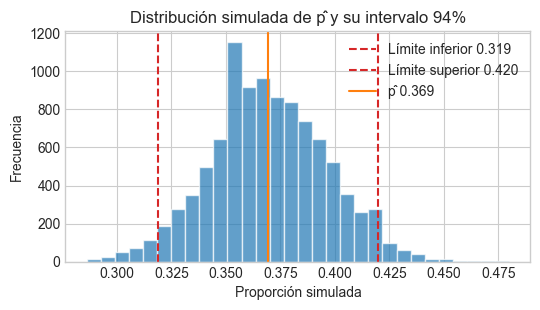

      escenario muestra (x/n)  p_con_hat  nivel_confianza  limite_inferior  \
0  Teatro (94%)       120/325   0.369231             0.94         0.318883   

   limite_superior  error_maximo  cp_inferior  cp_superior  
0         0.419579      0.050348     0.318646     0.422057  


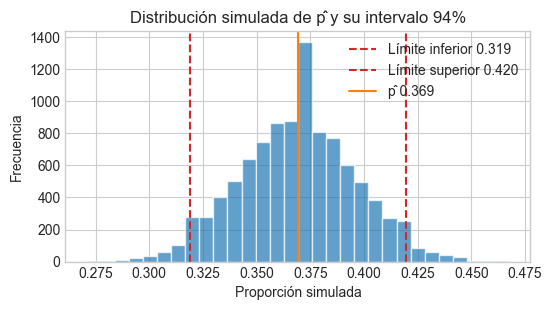

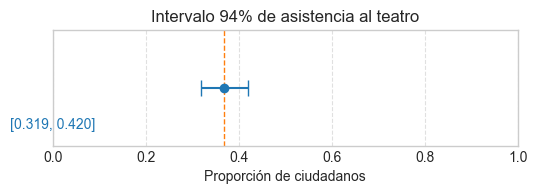

In [ ]:
# Visualizamos la distribución simulada de p_hat y su intervalo de confianza


# Mostramos el resumen del intervalo de confianza
resumen1 = resumen_intervalo("Teatro (94%)", res1, cp1)
print(resumen1)




## Problema 2: Escenario base y variación de nivel de confianza

En una encuesta realizada a 800 personas elegidas al azar del censo electoral, 240 declaran su intención de votar por el partido A.

a) Estimar, con un nivel de confianza del 95,45%, entre qué valores se encuentra la intención de voto a dicho partido en todo el censo.

b) Discutir, razonadamente, el efecto que tendría sobre el intervalo de confianza el aumento, o la disminución, del nivel de confianza.

Se analiza la intención de voto por el partido A, verificando los supuestos y calculando el intervalo con un nivel de confianza atípico del 95,45%, equivalente a dos desviaciones estándar z = 2.

,parametro,valor
0,n,800
1,x,240
2,p_hat,0.3
3,n*p_hat*(1-p_hat),168.0
4,condicion_normal,True
5,z_calculado,2.000002


## Problema 2: Sensibilidad del intervalo al nivel de confianza
Exploramos cómo cambia la amplitud del intervalo para distintos niveles de confianza y comparamos visualmente la anchura resultante.

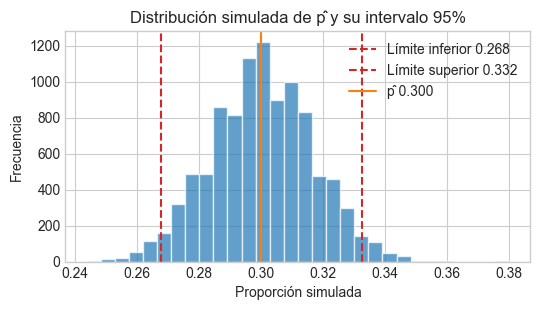

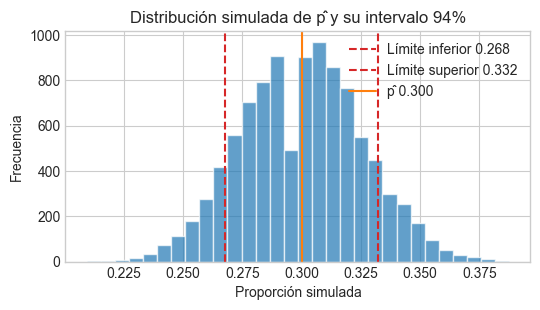

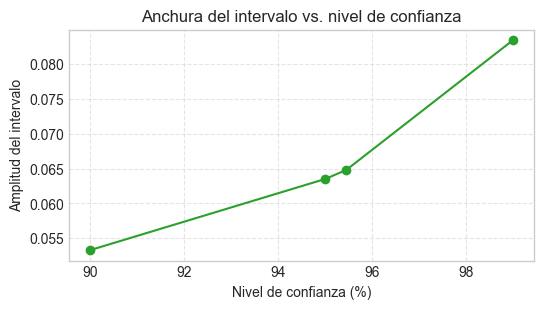

In [ ]:
# Visualizamos la distribución simulada de p_hat y su intervalo de confianza


# Mostramos el resumen del intervalo de confianza
info = resumen2.iloc[0]

## Problema 3: Intervalo, error máximo y tamaño muestral requerido

En un control de calidad se analizó una muestra aleatoria de 750 tornillos, resultando defectuosos 80 de ellos.

a) Hallar un intervalo de confianza para la proporción de tornillos defectuosos en el conjunto de producción con 99% de confianza.

b) ¿Cuál es el error máximo cometido en la estimación anterior?

c) Si deseamos que el error cometido, con el mismo nivel de confianza, sea la décima parte del apartado anterior, ¿cuál ha de ser el tamaño de la muestra?

Evaluamos la proporción de tornillos defectuosos, estimamos el error máximo asociado y determinamos el tamaño muestral necesario si buscamos reducir dicho error en un factor de diez manteniendo el 99% de confianza.

In [ ]:
error_actual = res3["error"]
error_objetivo = error_actual / 10
n_requerido = int(np.ceil(res3["p_hat"] * (1 - res3["p_hat"]) * (res3["z"] / error_objetivo) ** 2))

resumen3 = resumen_intervalo("Tornillos defectuosos (99%)", res3, cp3)

diagnostico3 = pd.DataFrame({
    "parametro": ["n", "x", "p_hat", "condicion_normal"],
    "valor": [n3, x3, p_hat3, condicion_normal_3]
})

dimensionamiento = pd.DataFrame({
    "escenario": ["Error actual", "Error objetivo", "Tamaño muestral requerido"],
    "valor": [error_actual, error_objetivo, n_requerido]
})

diagnostico3, resumen3, dimensionamiento

(          parametro     valor
 0                 n       750
 1                 x        80
 2             p_hat  0.106667
 3  condicion_normal      True,
                      escenario muestra (x/n)  p_con_hat  nivel_confianza  \
 0  Tornillos defectuosos (99%)        80/750   0.106667             0.99   
 
    limite_inferior  limite_superior  error_maximo  cp_inferior  cp_superior  
 0         0.077633         0.135701      0.029034     0.079548     0.138913  ,
                    escenario         valor
 0               Error actual      0.029034
 1             Error objetivo      0.002903
 2  Tamaño muestral requerido  75000.000000)

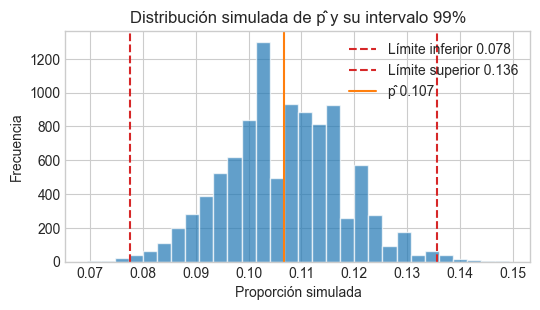

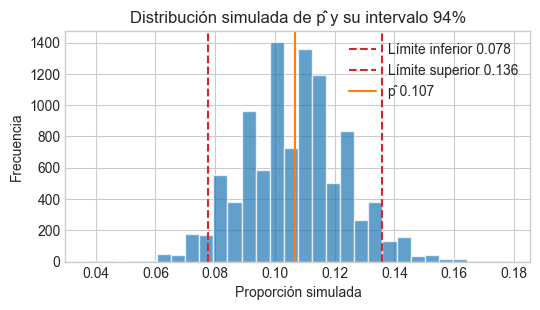

In [ ]:
# Visualizamos la distribución simulada de p_hat y su intervalo de confianza
num_simulaciones = 10000
simulaciones = np.random.binomial(n3, p_hat3, size=num_simulaciones) / n3

fig, ax = plt.subplots(figsize=(6, 3))
ax.hist(simulaciones, bins=30, color="tab:blue", alpha=0.7, edgecolor="white")
ax.axvline(res3["lower"], color="tab:red", linestyle="--", label=f"Límite inferior {res3['lower']:.3f}")
ax.axvline(res3["upper"], color="tab:red", linestyle="--", label=f"Límite superior {res3['upper']:.3f}")
ax.axvline(res3["p_hat"], color="tab:orange", linestyle="-", label=f"p̂ {res3['p_hat']:.3f}")
ax.set_title("Distribución simulada de p̂ y su intervalo 99%")
ax.set_xlabel("Proporción simulada")
ax.set_ylabel("Frecuencia")
ax.legend()
plt.show()

# Mostramos el resumen del intervalo de confianza
info = resumen3.iloc[0]

lim_inf = float(info["limite_inferior"])
lim_sup = float(info["limite_superior"])
p_hat = float(info["p_con_hat"])

num_simulaciones = 10000
simulaciones = np.random.binomial(n1, p_hat, size=num_simulaciones) / n1

fig, ax = plt.subplots(figsize=(6, 3))
ax.hist(simulaciones, bins=30, color="tab:blue", alpha=0.7, edgecolor="white")
ax.axvline(lim_inf, color="tab:red", linestyle="--", label=f"Límite inferior {lim_inf:.3f}")
ax.axvline(lim_sup, color="tab:red", linestyle="--", label=f"Límite superior {lim_sup:.3f}")
ax.axvline(p_hat, color="tab:orange", linestyle="-", label=f"p̂ {p_hat:.3f}")
ax.set_title("Distribución simulada de p̂ y su intervalo 99%")
ax.set_xlabel("Proporción simulada")
ax.set_ylabel("Frecuencia")
ax.legend()
plt.show()